# Librerías

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

# Diccionario

In [53]:
import pandas as pd

# Leer el archivo Excel
df_diccionarios = pd.read_excel('./files/envi_2020_fd.xlsx')

# Inicializar el diccionario para almacenar las secciones y preguntas
diccionario_secciones = {}
seccion_actual = None

# Recorrer el DataFrame fila por fila
for index, row in df_diccionarios.iterrows():
    # Identificar las filas que contienen 'SECCIÓN'
    if isinstance(row[1], str) and 'SECCIÓN' in row[1]:
        seccion_actual = row[1].strip()
        diccionario_secciones[seccion_actual] = []
    # Si estamos dentro de una sección, añadir las preguntas y nemónicos, excluyendo los encabezados y [1] y [2]
    elif seccion_actual and isinstance(row[1], str) and row[1].strip() not in ["Pregunta", "Nemónico", "[1]", "[2]"]:
        pregunta = row[1].strip() if isinstance(row[1], str) else ''
        nemonico = row[2].strip() if isinstance(row[2], str) else ''
        codigos = row[5] if not pd.isna(row[5]) else ''
        concepto = row[6] if not pd.isna(row[6]) else ''
        if pregunta and nemonico:
            diccionario_secciones[seccion_actual].append((pregunta, nemonico, codigos, concepto))
        elif not pregunta and not nemonico and codigos:
             if diccionario_secciones[seccion_actual]:
                last_entry = diccionario_secciones[seccion_actual][-1]
                diccionario_secciones[seccion_actual][-1] = (last_entry[0], last_entry[1], f"{last_entry[2]}, {codigos}", f"{last_entry[3]}, {concepto}")

# Guardar el diccionario en un archivo JSON
output_file = './processed_files/diccionario_secciones.json'
with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(diccionario_secciones, f, ensure_ascii=False, indent=4)

print(f"El diccionario ha sido guardado en {output_file}")


El diccionario ha sido guardado en ./processed_files/diccionario_secciones.json


---

# Archivos importantes

In [54]:
# Ruta archivos
ruta = './files/envi_2020_base_de_datos_csv/Bases de datos'
# Archivos
df_TVIVIENDA = pd.read_csv(ruta + '/TVIVIENDA.csv')
df_TSDEM = pd.read_csv(ruta + '/TSDEM.csv')

---

# Evaluación de NaNs en variables seleccionadas

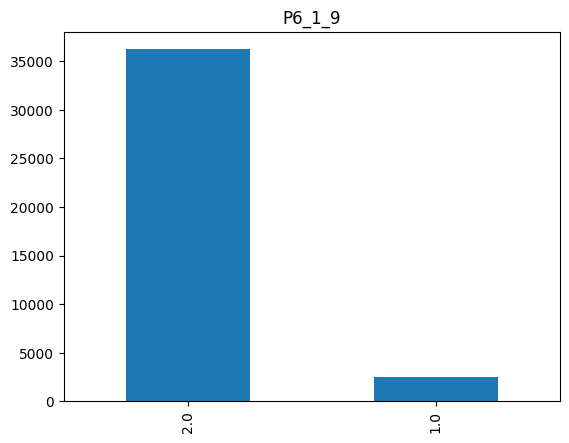

In [55]:
questions_to_evaluate = [
    "P4_4",
    "P4_5",
    "P4_6",
    "P4_13",
    "P4_14",
    "P4_15",
    "P4_16",
    "P4_10",
    "P4_10A",
    "P4_20_1",
    "P4_21_1",
    "P6_5_1",
    "P6_5_2",
    "P6_5_3",
    "P4_22_5",
    "P4_22_7",
    "P4_22_8"
]

questions_cicle = [
    "P6_1_9",
    "P5_29_4",
]
TVIVIENDA_questions = []
cicle_questions = []
none_questions = []


# Check which questions are title in every df
for question in questions_to_evaluate:
    if question in df_TVIVIENDA.columns:
        # Append the question to the list of questions
        TVIVIENDA_questions.append(df_TVIVIENDA[question])
    if question not in df_TVIVIENDA.columns:
        # Append the question to the list of questions
        none_questions.append(question)

# # Count nans for question in every column in the df that matches the question
# for i in range(len(TVIVIENDA_questions)):
#     print(f"Question: {questions_to_evaluate[i]}")
#     print(TVIVIENDA_questions[i].isna().sum())
#     print("")

# Build a DataFrame with the TVIVIENDA questions
df_TVIVIENDA_questions = pd.DataFrame()
for i in range(len(TVIVIENDA_questions)):
    df_TVIVIENDA_questions[questions_to_evaluate[i]] = TVIVIENDA_questions[i]


for question in questions_cicle:
    if question in df_TVIVIENDA.columns:
        # Append the question to the list of questions
        cicle_questions.append(df_TVIVIENDA[question])

df_circle_questions = pd.DataFrame()
for i in range(len(cicle_questions)):
    df_circle_questions[questions_cicle[i]] = cicle_questions[i]
df_circle_questions = df_circle_questions.dropna()
df_circle_questions['P6_1_9'].value_counts()

# Plot P6_1_9 vs P5_29_4
df_circle_questions['P6_1_9'].value_counts().plot(kind='bar')
plt.title('P6_1_9')
plt.show()
